In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from matplotlib import patches
plt.rcParams['font.size'] = 12

In [109]:
df = pd.concat([pd.read_csv(_, sep=' ', names='target alpha1 alpha2 phi deltaE'.split()) for _ in 'test.log test2.log'.split()])

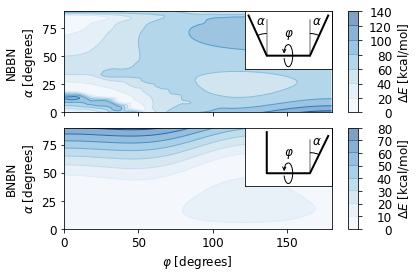

In [229]:
def do_figure():
    hartree = 627.50947406
    f, axs = plt.subplots(2, 1, sharex=True)
    targets = 'NBBN BNBN'.split()
    
    levels = (-130, -30, -15, -5, 0, 5, 15, 30, 45, 60, 75, 90, 120)
    levels = (-10, -5, -3, -1, 1, 3, 5,10 )
    levels=None
    cbars = []
    for target_id, target in enumerate(targets):
        ax = axs[target_id] 
        s = df[df.target == target]
        #s = s[s.alpha2 < 35]
        grid_x, grid_y = np.mgrid[0:180:100j, 0:max(s.alpha2):100j]
        grid_z = griddata(np.vstack((s.phi.values, s.alpha2.values)).T, abs(s.deltaE.values)*hartree, (grid_x, grid_y), method='cubic')
        grid_z[grid_z < 0] = 0
        #ax.tricontour(grid_x.reshape(-1), grid_y.reshape(-1), grid_z.reshape(-1))
        contourf = ax.tricontourf(grid_x.reshape(-1), grid_y.reshape(-1), grid_z.reshape(-1), antialiased=True, cmap='Blues', alpha=0.5, levels=levels)#, levels=(0, 1, 3, 5, 8, 10))
        contour = ax.tricontour(grid_x.reshape(-1), grid_y.reshape(-1), grid_z.reshape(-1), antialiased=True, cmap='Blues', linewidths=1, levels=levels)#, levels=(0, 1, 3, 5, 8, 10))
        
        cbar = f.colorbar(contourf, ax=ax, fraction=.15, aspect=10, pad=0.05)
        cbars.append(cbar)
        cbar.ax.set_ylabel('$\\Delta E$ [kcal/mol]')
        ax.set_ylabel('%s\n$\\alpha$ [degrees]' % target)
        ticklabs = cbar.ax.get_yticklabels()
        cbar.ax.set_yticklabels(ticklabs,ha='right')
        cbar.ax.yaxis.set_tick_params(pad=30)
        
    axs[1].set_xlabel('$\\varphi$ [degrees]')
    plt.subplots_adjust(hspace=0.15)
    
    # systems
    dx = 0.422
    dy = 0.906
    left, bottom, width, height = [0.545, 0.68, 0.2, 0.2]
    inset_top = f.add_axes([left, bottom, width, height])
    inset_top.set_xticks([])
    inset_top.set_yticks([])
    
    inset_top.plot((-dx, 0., 1, 1+dx), (dy, 0, 0, dy), color='black', lw=2)
    inset_top.set_ylim(-0.3, 1.)
    inset_top.set_xlim(-0.5, 1.5)
    inset_top.plot((1, 1), (0, 0.8), color='black', alpha=.4)
    inset_top.plot((0, 0), (0, 0.8), color='black', alpha=.4)
    p = patches.Arc((1, 0), 1., 1., 0., 65, 90)
    inset_top.add_patch(p)
    p = patches.Arc((0, 0), 1., 1., 0., 90, 115)
    inset_top.add_patch(p)
    inset_top.text(-0.25, 0.7, "$\\alpha$")
    inset_top.text(1.05, 0.7, "$\\alpha$")
    
    # phi
    p = patches.Arc((0.5, 0.0), 0.2, 0.5, 180., 30, 280)
    inset_top.add_patch(p)
    p = patches.FancyArrowPatch((0.5, 0.25), (0.4, 0.), arrowstyle="->",mutation_scale=8,connectionstyle='angle3,angleA=0,angleB=90')
    inset_top.add_patch(p)
    inset_top.text(0.4, 0.45, "$\\varphi$")
    
    # systems
    left, bottom, width, height = [0.545, 0.275, 0.2, 0.2]
    inset_top = f.add_axes([left, bottom, width, height])
    inset_top.set_xticks([])
    inset_top.set_yticks([])
    
    inset_top.plot((0, 0., 1, 1+dx), (1, 0, 0, dy), color='black', lw=2)
    inset_top.set_ylim(-0.3, 1.1)
    inset_top.set_xlim(-0.5, 1.5)
    inset_top.plot((1, 1), (0, 0.8), color='black', alpha=.4)
    p = patches.Arc((1, 0), 1., 1., 0., 65, 90)
    inset_top.add_patch(p)
    inset_top.text(1.05, 0.7, "$\\alpha$")
    
    # phi
    p = patches.Arc((0.5, 0.0), 0.2, 0.5, 180., 30, 280)
    inset_top.add_patch(p)
    p = patches.FancyArrowPatch((0.5, 0.25), (0.4, 0.), arrowstyle="->",mutation_scale=8,connectionstyle='angle3,angleA=0,angleB=90')
    inset_top.add_patch(p)
    inset_top.text(0.4, 0.45, "$\\varphi$")
    
    plt.savefig('dihscan.pdf', bbox_inches='tight')
do_figure()